# Scikit-Learn Jupyer Notebook
*****
*****

## Outline of this Notebook:

1. Overview of the scikit-learn package
2. Dataset: Penguin Dataset
    - Importing Packages for the Notebook
    - Exploring the Dataset
    - Preprocessing the Data
    - Data Visualisation
3. Train and Testing the Dataset
4. Data Modelling: Regression
    - Random Forest
    - Decision Tree
    - Naive Bayes
5. Comparison between models 
6. Conclusion
7. References

## 1. Overview of the scikit-learn library
******

### Defining Learning Problems with Scikit-Learn
***

The focus of machine learning is "acquiring skills or knowledge from experience"https://machinelearningmastery.com/types-of-learning-in-machine-learning/. Within the field itslef, there are many subfileds of study. The focus of this assessment is two main learning problems with Scikit-Learn. These are supervised and unsupervised learning.
<br>
<br>
**Supervised learning** occurs when the data"comes with additional attributes tht we want to predict"https://scikit-learn.org/stable/tutorial/basic/tutorial.html. The main aim is to assess and predict correlations of real world phenonema. The input and output are specified in this type of learning https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
- **classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

- **regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
<br>
**Unsupervised learning** involves algorithms "consists of a set of input vectors x without any corresponding target values.... goal in such problems may be to discover groups of similiar examples within the data or to determine the distribution of data" https://scikit-learn.org/stable/tutorial/basic/tutorial.html .he data and the recommendations generated from the algorithms are pre determined. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML

## 2. Dataset: Penguin Dataset
******

### Importing packages
<br>

The Scikit-Learn package is built upon SciPy (Scientific Python) that most be installed beforehand https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/c2. SciPy packages that will be used in this notebook are imported in the below code block alongwith the preferred plot modelling. 

In [895]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for all graphical and plotting purposes
import seaborn as sns
#import missingno as msno
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import pandas as pd # numerical arrarys
import numpy as np # data frames
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical plots
import sklearn.linear_model as ln # Logistic Regression
import sklearn.neighbors as nei # K nearest neighbours
import sklearn.model_selection as mod # helper functions
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [896]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [897]:
df = pd.read_csv("penguins_size.csv") # reading in the dataset

### Exploring the Dataset

The Palmer Penguin dataset will be used in this project.https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv. In this section, the dataset is exploered at a higher level to establish any initial observations determine the scikit-learn packages that will be used and if there are any issues with the data that need to be resolved.

The below functions look at samples from the dataset, its composition and whether or not any datapoints are missing.  

In [898]:
df.shape

(344, 7)

In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [900]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
94,Adelie,Dream,36.2,17.3,187.0,3300.0,FEMALE
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,FEMALE
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,FEMALE
301,Gentoo,Biscoe,52.5,15.6,221.0,5450.0,MALE
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,FEMALE
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,FEMALE
84,Adelie,Dream,37.3,17.8,191.0,3350.0,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE


In [901]:
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [902]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [903]:
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [904]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [905]:
df.describe() # important in prediction of the class later on

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Preprocessing the Data

#### Dealing with Nan within the dataset
<br>
From the initial analysis, there are null values within the dataset, this section explores this further and the potential impact it may have on the dataset.

In [906]:
df.isnull().values.any()

True

In [907]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [908]:
df.isnull().sum().sum() #https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

18

In [909]:
# creating bool series True for NaN values https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
bool_series = pd.isnull(df["sex"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [910]:
df.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN will be dropped as gender may form part of the prediction process later on and these are incomplete datapoints

In [911]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [912]:
df.shape

(334, 7)

In [913]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [914]:
df["island"].value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

### Data Visualisation

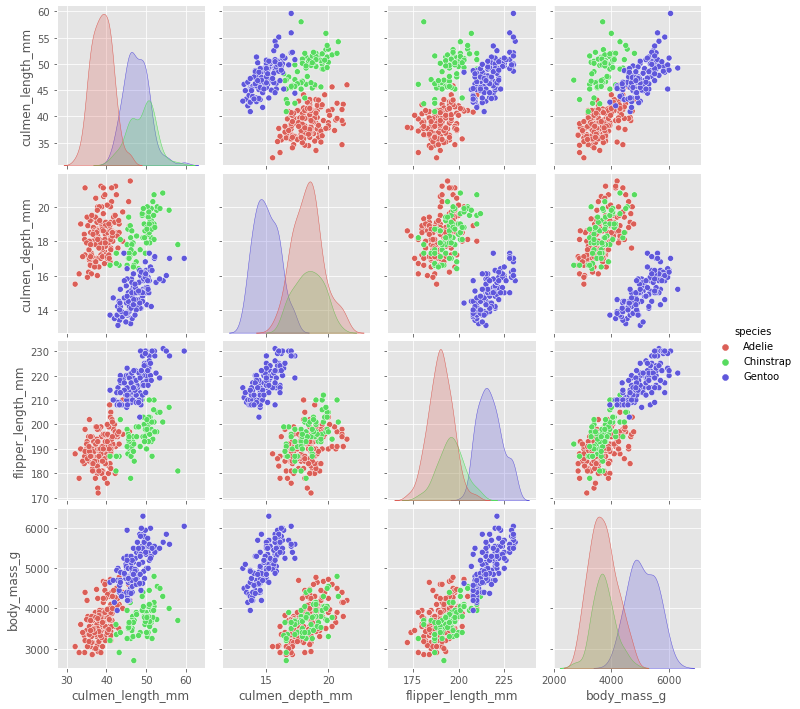

In [915]:
sns.pairplot(data=df, hue='species', palette=sns.color_palette(palette='hls' ,n_colors=3))

Text(0, 0.5, 'Body Mass')

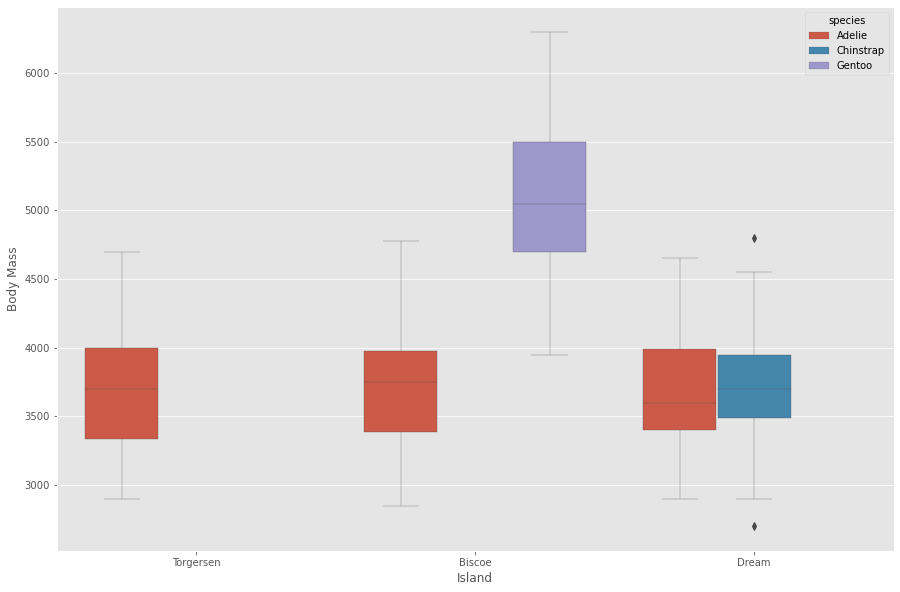

In [916]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

The above Pairplot provides an overview of the data and key information to inform the notebook can be ascertained. In this case, the Gentoo species seems to have more distinct feature from the other two species which can possible be used to predict the species later on. From an initial analysis of the data, Gentoo seems to have different attributes to the other species making it possible to predict a Gentoo penguin from the other two species. Adelie and Chinstrap are more similiar in their feature. Prediction of  each of the species from their attributes may be possible using measurements of the body mass and culmen length, culmen length and culmen depth and also flipper length and culmen length. The species, island and sex attributes will now be looked at to determine the prediction variable.  These will form the basis of the machine learning algorithms discussed and implemented in this notebook.

#### Correlation

From the above exploratory data anaylsis and subsequent preprocessing of the date, intial observations include: 
<br>
- Adelie is the most popular instance of penguin in the data set
- The Gentoo species appears to be distinguishable from the Adelie and Chinstrap species
- There appears to be a correlation between the flipper length and body mass for all penguins
- The culmen length and culmen depth in each of the species may be used as a way of predicting the species 
<br>

This section further explores the relationships between the variables in the penguin dataset.
- **Correlation** measures the strength and direction of linear realtionships between two variables https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:

*A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, as does the other.* https://datagy.io/python-correlation-matrix/

In [917]:
x = df.groupby('species')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


In [918]:
x = df.groupby('island')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.243902,15.906098,209.603659,4720.121951
Dream,44.221951,18.339837,193.186992,3718.902439
Torgersen,39.038298,18.451064,191.531915,3708.510638


In [919]:
x = df.groupby('sex')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


A correlation matrix visually indicates the relationship between two variables for the data set as a whole. 

In [920]:
matrix = df.corr()
print(matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228640           0.652126   
culmen_depth_mm           -0.228640         1.000000          -0.578730   
flipper_length_mm          0.652126        -0.578730           1.000000   
body_mass_g                0.589066        -0.472987           0.873211   

                   body_mass_g  
culmen_length_mm      0.589066  
culmen_depth_mm      -0.472987  
flipper_length_mm     0.873211  
body_mass_g           1.000000  


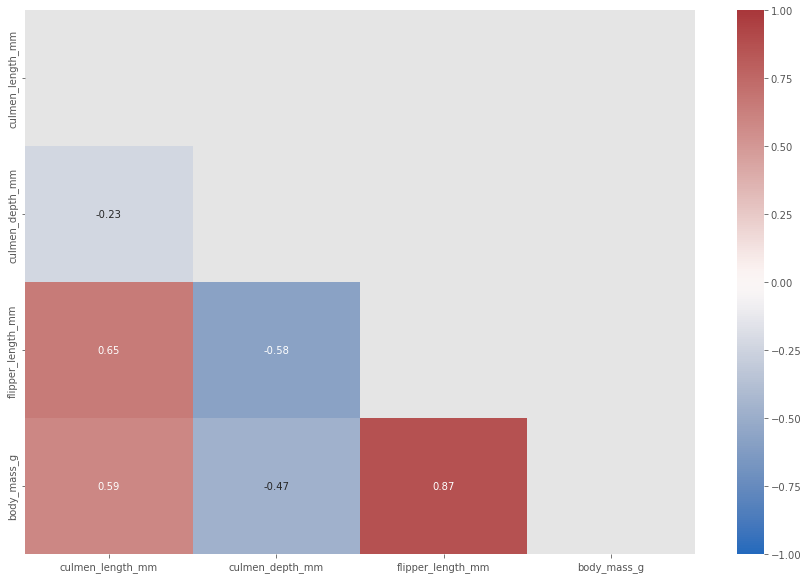

In [921]:
matrix = df.corr().round(2) #https://datagy.io/python-correlation-matrix/
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

The values in the matrix above range from 0 - 1 with flipper length and body mass having the strongest correlation when considering all the specieis of penguins.

## Train and Testing the Dataset

In [922]:
#Split our data in trainng and testing models
train, test = mod.train_test_split(df,test_size=.33, random_state=1) # https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [923]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
145,Adelie,Dream,39.0,18.7,185.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
227,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,MALE
177,Chinstrap,Dream,52.0,19.0,197.0,4150.0,MALE
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE


In [924]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,MALE
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,FEMALE
294,Gentoo,Biscoe,46.4,15.0,216.0,4700.0,FEMALE


In [925]:
test.index.size

111

In [926]:
inputs, outputs = train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']], train['species']

In [927]:
inputs.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
145,39.0,18.7,185.0,3650.0
6,38.9,17.8,181.0,3625.0
227,46.7,15.3,219.0,5200.0
177,52.0,19.0,197.0,4150.0
43,44.1,19.7,196.0,4400.0


In [928]:
outputs.head()

145       Adelie
6         Adelie
227       Gentoo
177    Chinstrap
43        Adelie
Name: species, dtype: object

The data will now be put into a two dimensional test-train split

In [929]:
train,test = mod.train_test_split(df)

In [930]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
308,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,FEMALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,MALE


In [931]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,FEMALE
185,Chinstrap,Dream,51.0,18.8,203.0,4100.0,MALE
121,Adelie,Torgersen,37.7,19.8,198.0,3500.0,MALE


In [932]:
test.index.size

84

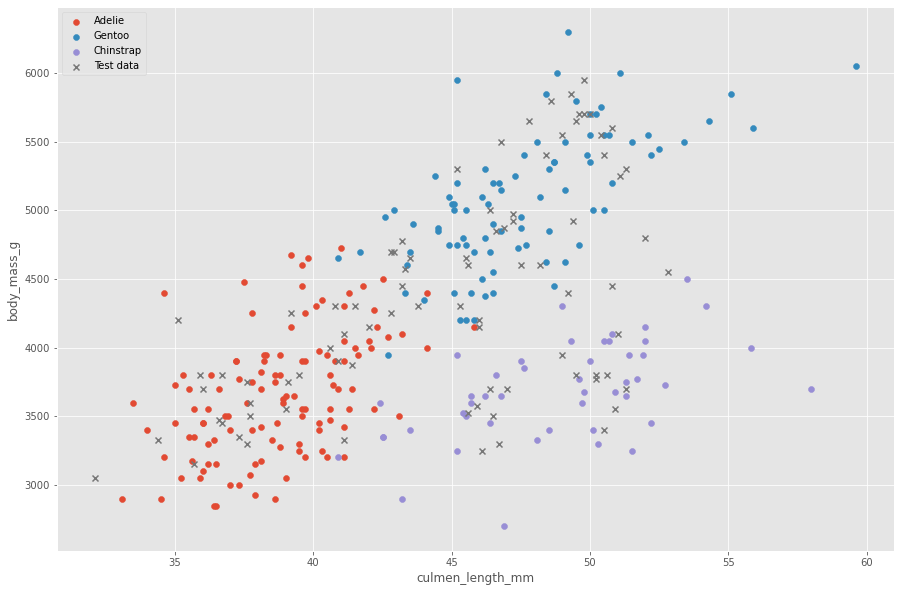

In [933]:
ade = train[train['species'] == 'Adelie']
gen = train[train['species'] == 'Gentoo']
chin = train[train['species'] == 'Chinstrap']
             
fig, ax = plt.subplots()
             
ax.scatter(ade['culmen_length_mm'], ade['body_mass_g'], marker='o', label='Adelie')
ax.scatter(gen['culmen_length_mm'], gen['body_mass_g'], marker='o', label='Gentoo')
ax.scatter(chin['culmen_length_mm'], chin['body_mass_g'], marker='o', label='Chinstrap') 
        
ax.scatter(test['culmen_length_mm'], test ['body_mass_g'], marker ='x', label= 'Test data')
        
ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('body_mass_g')
ax.legend();

In [934]:
inputs, outputs = train[['culmen_length_mm', 'body_mass_g']], train['species']

In [935]:
inputs.head()

,culmen_length_mm,body_mass_g
308,47.5,4875.0
65,41.6,3950.0
43,44.1,4400.0
343,49.9,5400.0
186,49.7,3600.0


In [936]:
outputs.head()

308       Gentoo
65        Adelie
43        Adelie
343       Gentoo
186    Chinstrap
Name: species, dtype: object

In [937]:
lre = ln.LogisticRegression(random_state=0)
lre.fit(inputs, outputs)

C:\Users\Owner1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [938]:
predictions = lre.predict(test[['culmen_length_mm', 'body_mass_g']])
predictions

array(['Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie'], dtype=

In [939]:
predictions == test['species']

313     True
180     True
296     True
185     True
121     True
219     True
223     True
267     True
21      True
160    False
38      True
175     True
235     True
152     True
232     True
22      True
166     True
262     True
278     True
295     True
279     True
276     True
161     True
338     True
316     True
84      True
322     True
251     True
176     True
319     True
194     True
270     True
59      True
261     True
82      True
305     True
325     True
179     True
236    False
307     True
150     True
1       True
33      True
75      True
178     True
192     True
146     True
332     True
158     True
247     True
147     True
328     True
285     True
19     False
83      True
181    False
109    False
231     True
125     True
142     True
171    False
189    False
4       True
81     False
210     True
291     True
123     True
164     True
127     True
18      True
248     True
67      True
269     True
0       True
56      True
317     True
211     True

In [940]:
lre.score(test[['culmen_length_mm', 'body_mass_g']], test['species'])

0.8809523809523809

In [941]:
test['predicted'] = predictions
test.head()


C:\Users\Owner1\AppData\Local\Temp/ipykernel_18784/3618166550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE,Gentoo
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE,Chinstrap
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,FEMALE,Gentoo
185,Chinstrap,Dream,51.0,18.8,203.0,4100.0,MALE,Chinstrap
121,Adelie,Torgersen,37.7,19.8,198.0,3500.0,MALE,Adelie


In [942]:
misclass = test[test['predicted'] != test['species']]
misclass

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE,Gentoo
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,FEMALE,Adelie
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE,Gentoo
181,Chinstrap,Dream,52.8,20.0,205.0,4550.0,MALE,Gentoo
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,MALE,Gentoo
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE,Gentoo
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,MALE,Gentoo
81,Adelie,Torgersen,42.9,17.6,196.0,4700.0,MALE,Gentoo
111,Adelie,Biscoe,45.6,20.3,191.0,4600.0,MALE,Gentoo
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,MALE,Gentoo


In [943]:
train.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.762931,18.281034,190.000000,3672.198276
Chinstrap,48.776596,18.278723,195.425532,3682.446809
Gentoo,47.567816,14.936782,217.206897,5074.712644


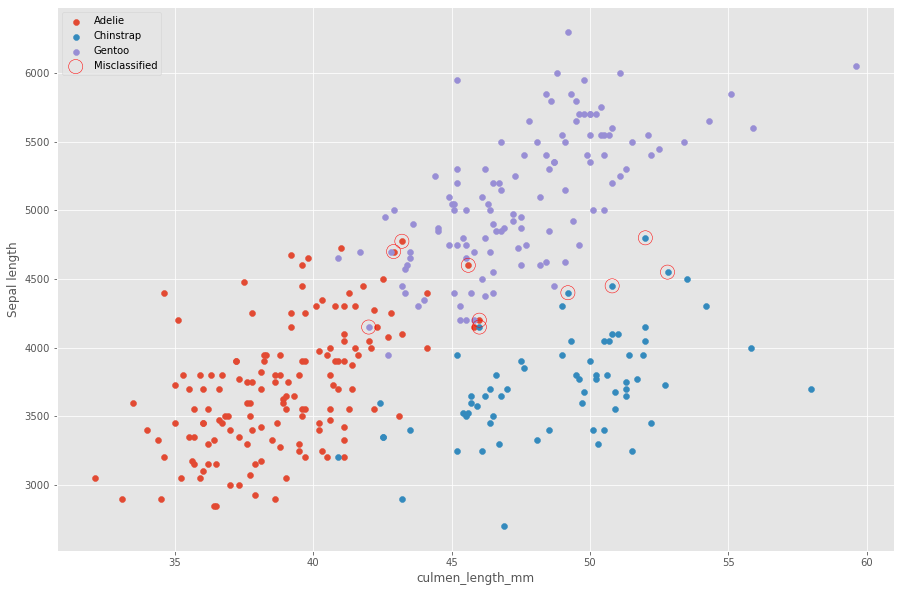

In [944]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['culmen_length_mm'], data['body_mass_g'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['culmen_length_mm'], misclass['body_mass_g'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('Sepal length')
ax.legend();

In [945]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [946]:
# Use all four possible inputs.
inputs, outputs = train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], train['species']

In [947]:
# Create a new classifier.
lre = ln.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\Owner1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [948]:
predictions = lre.predict(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
predictions

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie'], dtype=object)

In [949]:
# Eyeball the misclassifications.
(predictions == test['species']).value_counts()

True     81
False     3
Name: species, dtype: int64

In [950]:
# What proportion were correct?
lre.score(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], test['species'])

0.9642857142857143

## Data Modelling: Regression
******

In [951]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [1024]:
x = df.iloc[:,5:6].values 
print(x)
y = df.iloc[:, 4].values
print(y)

[[3750.]
 [3800.]
 [3250.]
 [3450.]
 [3650.]
 [3625.]
 [4675.]
 [3200.]
 [3800.]
 [4400.]
 [3700.]
 [3450.]
 [4500.]
 [3325.]
 [4200.]
 [3400.]
 [3600.]
 [3800.]
 [3950.]
 [3800.]
 [3800.]
 [3550.]
 [3200.]
 [3150.]
 [3950.]
 [3250.]
 [3900.]
 [3300.]
 [3900.]
 [3325.]
 [4150.]
 [3950.]
 [3550.]
 [3300.]
 [4650.]
 [3150.]
 [3900.]
 [3100.]
 [4400.]
 [3000.]
 [4600.]
 [3425.]
 [3450.]
 [4150.]
 [3500.]
 [4300.]
 [3450.]
 [4050.]
 [2900.]
 [3700.]
 [3550.]
 [3800.]
 [2850.]
 [3750.]
 [3150.]
 [4400.]
 [3600.]
 [4050.]
 [2850.]
 [3950.]
 [3350.]
 [4100.]
 [3050.]
 [4450.]
 [3600.]
 [3900.]
 [3550.]
 [4150.]
 [3700.]
 [4250.]
 [3700.]
 [3900.]
 [3550.]
 [4000.]
 [3200.]
 [4700.]
 [3800.]
 [4200.]
 [3350.]
 [3550.]
 [3800.]
 [3500.]
 [3950.]
 [3600.]
 [3550.]
 [4300.]
 [3400.]
 [4450.]
 [3300.]
 [4300.]
 [3700.]
 [4350.]
 [2900.]
 [4100.]
 [3725.]
 [4725.]
 [3075.]
 [4250.]
 [2925.]
 [3550.]
 [3750.]
 [3900.]
 [3175.]
 [4775.]
 [3825.]
 [4600.]
 [3200.]
 [4275.]
 [3900.]
 [4075.]
 [2900.]
 

In [1021]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [995]:
Y_pred = regressor.predict(np.array([1.5]).reshape(1, 1))  # test the output by changing values

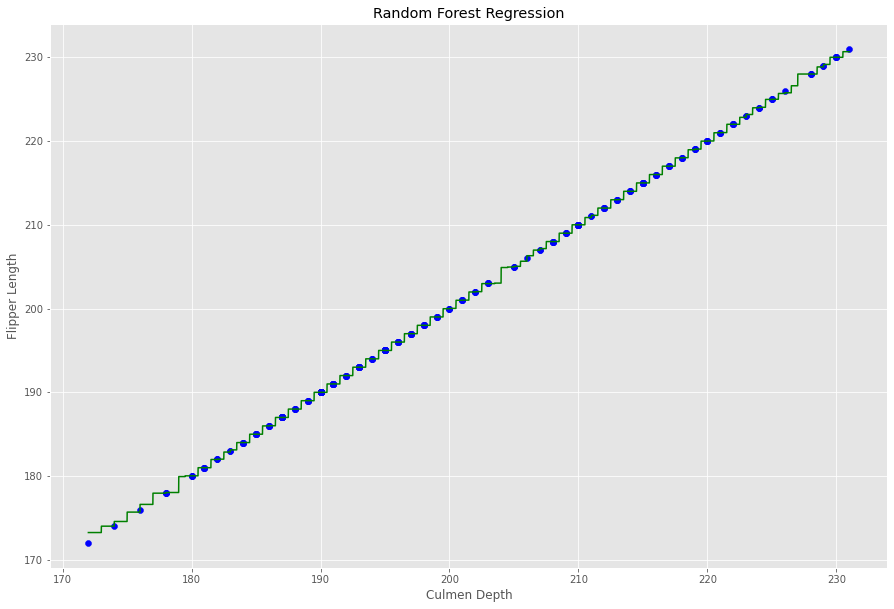

In [1022]:
# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Culmen Depth')
plt.ylabel('Flipper Length')
plt.show()

In [1001]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [1002]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.0+ KB


X=df.iloc[:,1:5].values # https://www.kaggle.com/mainakchaudhuri/penguin-data-analysis#3.1-Random-Forest:
y=df.iloc[:,5].values

In [1016]:
# select all rows by : and column 1
# by 1:2 representing features
X = df.iloc[:,4:5].astype(int) 
  
# print X
print(X)

     flipper_length_mm
0                  181
1                  186
2                  195
4                  193
5                  190
6                  181
7                  195
12                 182
13                 191
14                 198
15                 185
16                 195
17                 197
18                 184
19                 194
20                 174
21                 180
22                 189
23                 185
24                 180
25                 187
26                 183
27                 187
28                 172
29                 180
30                 178
31                 178
32                 188
33                 184
34                 195
35                 196
36                 190
37                 180
38                 181
39                 184
40                 182
41                 195
42                 186
43                 196
44                 185
45                 190
46                 182
48         

In [1008]:
# select all rows by : and column 2
# by 2 to Y representing labels
y = df.iloc[:, 2].astype(int) 
  
# print y
print(y)

0      39
1      39
2      40
4      36
5      39
6      38
7      39
12     41
13     38
14     34
15     36
16     38
17     42
18     34
19     46
20     37
21     37
22     35
23     38
24     38
25     35
26     40
27     40
28     37
29     40
30     39
31     37
32     39
33     40
34     36
35     39
36     38
37     42
38     37
39     39
40     36
41     40
42     36
43     44
44     37
45     39
46     41
48     36
49     42
50     39
51     40
52     35
53     42
54     34
55     41
56     39
57     40
58     36
59     37
60     35
61     41
62     37
63     41
64     36
65     41
66     35
67     41
68     35
69     41
70     33
71     39
72     39
73     45
74     35
75     42
76     40
77     37
78     36
79     42
80     34
81     42
82     36
83     35
84     37
85     41
86     36
87     36
88     38
89     38
90     35
91     41
92     34
93     39
94     36
95     40
96     38
97     40
98     33
99     43
100    35
101    41
102    37
103    37
104    37
105    39


In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

https://github.com/mcnakhaee/palmerpenguins
decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.metrics import confusion_matrix
### To deal with missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

X,y = load_penguins(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                            random_state=0)
imp = IterativeImputer(max_iter=10, random_state=0)
clf = make_pipeline(imp, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo']))
array([[47,  1,  0],
       [ 3, 17,  0],
       [ 0,  0, 32]], dtype=int64)
print(clf.score(X_test,y_test))
0.96

In [953]:
print ("Features: ", df.feature_names)

AttributeError: 'DataFrame' object has no attribute 'feature_names'

## Comparison between Models
******

In [ ]:
import pingouin as pg # https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html#pingouin.pairwise_gameshowell
df = pg.read_dataset('penguins')
pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

## Conclusion
******

- Careful consideration must be taken for NaN values and their impact of the prediction results of a dataset. In this instance, all Nan values were excluded but further investigation may be conducted on the NaN values to determine if they are outliers or might influence the results drawn from the analysis.
- As the amount of species were not equal, it may have lead to unequal prediction within the sample, stratify can be included in the test and train model to ensure proportionate representatins in each group.

Scikit Learn is a Python library for machine learning, consisting of learning algorithms for machine learning and statistical modeling. The library was was initially developed by David Cournapeau in 2007 before being further developed by the FIRCA (French Institute for Research in Computer Science and Automation) leading to its first public realesae in 2010. https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htmScikit. It's popularity of use is largely due to ease of use, being open sourse, portable, powerful and wide ranging content and relative flexibility for use in Machine Learning projects. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab 

<br>

Scikit-Learn's purpose is data modellying and is easily integrated with other packages to provide data handling, manipulation and visualisation. It is built upon Python packages which include Numpy, SciPy Matplotlib. Pandas and Sci Py. The library provides methods of supervised and unsupervised learning algorithms including regression, classification and clustering of data. The library also offers other functions including ensemble methods, feature manipulation, outlier detection and model selection and validation. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab

## References

# End

*******